In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib_inline

In [3]:
df = pd.read_csv("london.csv")

In [4]:
# check null values
df.isna().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [5]:
# check shape
df.shape

(17414, 10)

In [6]:
# check types
df.dtypes

timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [7]:
# convert date types
df.timestamp = pd.to_datetime(df.timestamp)
df.is_holiday = df.is_holiday.astype('int')
df.is_weekend = df.is_weekend.astype('int')
df.season = df.season.astype('int')
df.weather_code = df.weather_code.astype('int')

<AxesSubplot:xlabel='timestamp', ylabel='cnt'>

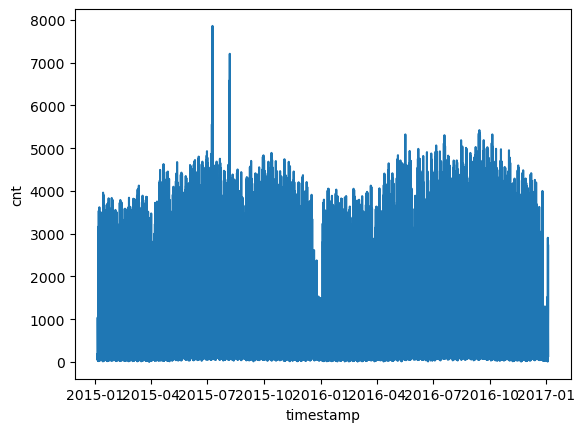

In [8]:
# Transform the data and count the number of trips per day. Visualize the result
sns.lineplot(data=df, x="timestamp", y="cnt")

<AxesSubplot:xlabel='timestamp'>

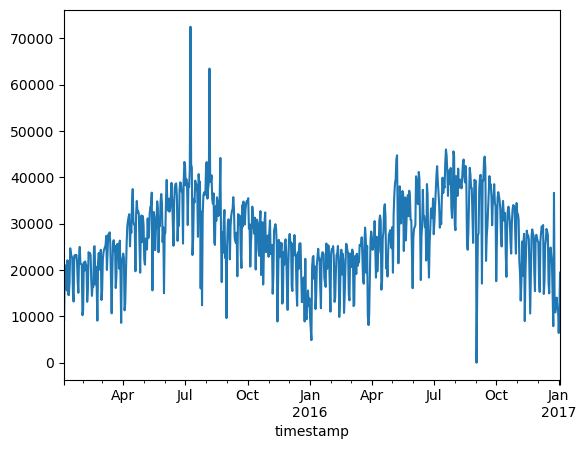

In [9]:
# previous plot is difficult to read
trips_per_day = df.loc[:, ['timestamp', 'cnt']].set_index('timestamp').resample(rule='D').cnt.sum()
trips_per_day.plot()

In [10]:
# Calculate the difference between the observed values and the values calculated using the moving average
trips_per_day = trips_per_day.to_frame()

In [11]:
trips_per_day['moving_avg'] = trips_per_day.cnt.rolling(3).mean()
trips_per_day['dif'] = trips_per_day.cnt - trips_per_day.moving_avg

In [12]:
# Find the standard deviation
cnt_std = np.std(trips_per_day.dif)

In [13]:
# Determine the boundaries of the 99% confidence interval, add this information to the dataframe
trips_per_day['lower_bound'] = trips_per_day.moving_avg - 2.576 * cnt_std
trips_per_day['upper_bound'] = trips_per_day.moving_avg + 2.576 * cnt_std

In [14]:
# Examine the abnormally high values and indicate the day when the number of rentals was the highest
trips_per_day.loc[trips_per_day.cnt > trips_per_day.upper_bound].sort_values("cnt", ascending=False)

,cnt,moving_avg,dif,lower_bound,upper_bound
timestamp,,,,,
2015-07-09,72504,50705.000000,21799.000000,38962.080812,62447.919188
2015-08-06,63468,46627.333333,16840.666667,34884.414146,58370.252521
2016-12-25,36653,19650.666667,17002.333333,7907.747479,31393.585854
2016-09-04,27512,14259.000000,13253.000000,2516.080812,26001.919188


In [15]:
# Find the cause of the anomaly on 2015-07-09
df.loc[df.timestamp == '2015-07-09']

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
4453,2015-07-09,400,16.0,16.0,55.0,14.0,1,0,0,1


In [16]:
# weather was nice, it wasn't a holiday or weekend. Google says that there were strices in London that day

In [17]:
# find the cause of the anomaly on 2016-09-02
trips_per_day.loc[trips_per_day.cnt < trips_per_day.lower_bound].sort_values("cnt", ascending=True)
df.loc[df.timestamp == '2016-09-02']

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
